<a href="https://colab.research.google.com/github/Shantanu2807/Quant-analysis/blob/main/stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional
from sklearn.metrics import precision_score

In [ ]:
nvda=yf.Ticker("NVDA")
nvda=nvda.history(period="max")
nvda=nvda[['Open','Close']]
nvda

,Open,Close
Date,,
1999-01-22 00:00:00-05:00,0.040125,0.037618
1999-01-25 00:00:00-05:00,0.040603,0.041559
1999-01-26 00:00:00-05:00,0.042036,0.038334
1999-01-27 00:00:00-05:00,0.038453,0.038215
1999-01-28 00:00:00-05:00,0.038215,0.038095
...,...,...
2024-09-23 00:00:00-04:00,116.550003,116.260002
2024-09-24 00:00:00-04:00,116.519997,120.870003
2024-09-25 00:00:00-04:00,122.019997,123.510002


<Axes: xlabel='Date'>

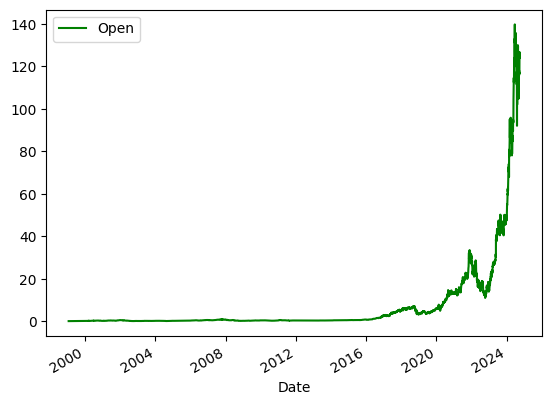

In [ ]:
nvda.plot.line(y="Open",use_index=True,color='green')

<Axes: xlabel='Date'>

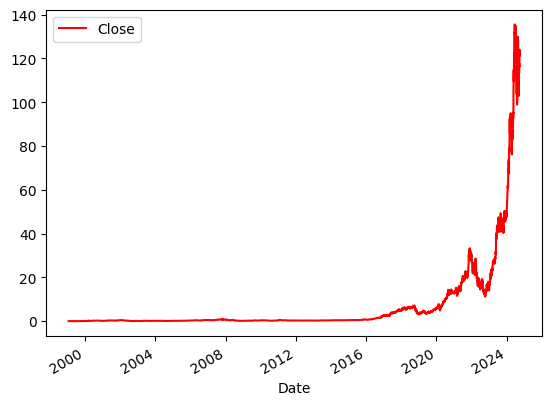

In [ ]:
nvda.plot.line(y="Close",use_index=True,color='red')

In [ ]:
Ms=MinMaxScaler()
nvda[nvda.columns]=Ms.fit_transform(nvda)

training_size=round(len(nvda) * 0.80)

train_data = nvda[:training_size]
test_data  = nvda[training_size:]

In [ ]:
def create_sequence(dataset):
  sequences = []
  labels = []

  start_idx = 0

  for stop_idx in range(50,len(dataset)):
    sequences.append(dataset.iloc[start_idx:stop_idx])
    labels.append(dataset.iloc[stop_idx])
    start_idx += 1
  return (np.array(sequences),np.array(labels))

train_seq, train_label = create_sequence(train_data)
test_seq, test_label = create_sequence(test_data)

In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape = (train_seq.shape[1], train_seq.shape[2])))
model.add(Dropout(0.1))
model.add(LSTM(units=50))
model.add(Dense(2))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 50, 50)              │          10,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 50, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2)                   │             102 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,902 (120.71 KB)

 Trainable params: 30,902 (120.71 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(train_seq, train_label, epochs=80,validation_data=(test_seq, test_label), verbose=1)
test_predicted = model.predict(test_seq)
test_inverse_predicted = Ms.inverse_transform(test_predicted)

Epoch 1/80
160/160 ━━━━━━━━━━━━━━━━━━━━ 15s 61ms/step - loss: 2.4449e-05 - mean_absolute_error: 0.0025 - val_loss: 0.0026 - val_mean_absolute_error: 0.0240
Epoch 2/80
160/160 ━━━━━━━━━━━━━━━━━━━━ 12s 76ms/step - loss: 9.0795e-07 - mean_absolute_error: 5.3028e-04 - val_loss: 0.0032 - val_mean_absolute_error: 0.0275
Epoch 3/80
160/160 ━━━━━━━━━━━━━━━━━━━━ 17s 52ms/step - loss: 1.0779e-06 - mean_absolute_error: 6.1838e-04 - val_loss: 0.0028 - val_mean_absolute_error: 0.0261
Epoch 4/80
160/160 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 9.8345e-07 - mean_absolute_error: 6.0293e-04 - val_loss: 0.0019 - val_mean_absolute_error: 0.0202
Epoch 5/80
160/160 ━━━━━━━━━━━━━━━━━━━━ 11s 43ms/step - loss: 8.6246e-07 - mean_absolute_error: 5.8411e-04 - val_loss: 0.0022 - val_mean_absolute_error: 0.0233
Epoch 6/80
160/160 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - loss: 1.2345e-06 - mean_absolute_error: 7.2580e-04 - val_loss: 0.0014 - val_mean_absolute_error: 0.0178
Epoch 7/80
160/160 ━━━━━━━━━━━━━━━━━━━━ 7s 41m

In [ ]:
gs_slic_data = pd.concat([nvda.copy(),pd.DataFrame(test_inverse_predicted,columns=['open_predicted','close_predicted'],index=test_data.index)], axis=1)
gs_slic_data[['open','close']] = Ms.inverse_transform(gs_slic_data[['Open','Close']])

ValueError: Shape of passed values is (1243, 2), indices imply (1293, 2)

In [ ]:
nvda

In [ ]:
gs_slic_data[['Open','open_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for open price',size=15)
plt.show()

In [ ]:
gs_slic_data[['Close','close_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for close price',size=15)
plt.show()